In [1]:
from rdkit.Chem import MolFromSmiles
from descriptors import num_atoms
from datasets import ZINCSmiles, FishTox
from torch_geometric.datasets import MoleculeNet

dataset = MoleculeNet('/data', 'sider') #ZINCSmiles('/data', num_atoms)#, transform=lambda smiles: CalcNumRings(MolFromSmiles(smiles)))

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:47: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:101: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io

In [2]:
! pip install scipy==1.7.3

In [3]:
dataset[0]

Data(x=[13, 9], edge_index=[2, 24], edge_attr=[24, 3], smiles='C(CNCCNCCNCCN)N', y=[1, 27])

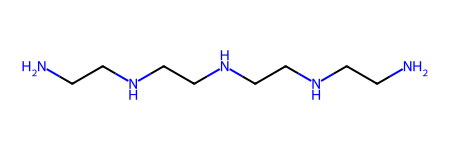

In [4]:
mol = MolFromSmiles(dataset.smiles[0])
mol

In [5]:
# encoder(dataset.smiles[1561])

In [6]:
from datasets.utils import prepare_molecular_dataset
from encoder import KPGTEncoder


dataset = prepare_molecular_dataset(dataset, encoder=KPGTEncoder(), representation_path='/data/representations', read_only=True)

Opening /data/representations/KPGT_base/values.h5py


In [27]:
for i, entry in enumerate(dataset):
    if (entry[0]!=entry[0]).sum()>0:
        print(i)
        print(entry)

14
(array([nan, nan, nan, ..., nan, nan, nan], dtype=float32), tensor([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0.]))
165
(array([nan, nan, nan, ..., nan, nan, nan], dtype=float32), tensor([1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1.]))
431
(array([nan, nan, nan, ..., nan, nan, nan], dtype=float32), tensor([1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1.]))
1184
(array([nan, nan, nan, ..., nan, nan, nan], dtype=float32), tensor([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]))
1376
(array([nan, nan, nan, ..., nan, nan, nan], dtype=float32), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]))


In [28]:
from datasets.utils import NormalizedDataset
dataset = NormalizedDataset(dataset)
dataset[0]

[array([-1.6885673 ,  0.7735403 ,  0.85995626, ..., -1.6028761 ,
       -1.7737738 ,  1.4384488 ], dtype=float32), tensor([1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 0.])] [0, 0]
[array([ 0.24294508, -2.931406  ,  2.5111408 , ..., -1.3573676 ,
       -3.477777  ,  3.174768  ], dtype=float32), tensor([1., 2., 0., 0., 2., 2., 2., 0., 0., 1., 0., 1., 0., 0., 0., 0., 2., 0.,
        1., 2., 1., 0., 0., 2., 1., 2., 0.])] [1, 1]
[array([ 0.9626202, -4.734664 ,  4.2373095, ..., -0.897501 , -2.9445176,
        3.7587128], dtype=float32), tensor([1., 3., 0., 1., 3., 2., 3., 0., 1., 2., 1., 1., 0., 0., 1., 0., 3., 0.,
        1., 2., 2., 0., 0., 2., 1., 3., 0.])] [2, 2]
[array([ 2.1777058 , -5.838824  ,  6.314358  , ..., -0.46896648,
       -2.3308864 ,  4.6623755 ], dtype=float32), tensor([2., 4., 0., 2., 4., 3., 4., 0., 2., 3., 2., 2., 0., 1., 2., 0., 4., 1.,
        2., 3., 3., 1., 1., 2., 1., 4., 1.])] [3, 3]
[array([ 0.725

[array([-0.48466417,  0.22745208,  0.21072637, ..., -0.6628552 ,
        -0.52636325,  0.8997153 ], dtype=float32),
 tensor([ 0.9581,  0.6563, -0.1251, -1.2609,  0.4879,  0.6552,  0.3128, -0.4620,
         -1.5940, -1.0191, -0.5981,  0.3209, -0.5409, -0.4189, -1.8637, -1.2778,
          0.2849, -0.4642, -1.5458,  0.5868,  0.6345, -1.3287, -0.3098,  1.0781,
          0.6651,  0.3046, -1.4024])]

In [29]:
dataset.transform.std

[array([2.0254593, 2.658272 , 2.213268 , ..., 1.2539656, 1.3260477,
        1.0520916], dtype=float32),
 tensor([0.4999, 0.4595, 0.1233, 0.4872, 0.3952, 0.4592, 0.2870, 0.3810, 0.4505,
         0.5003, 0.4408, 0.2929, 0.4188, 0.3566, 0.4169, 0.4857, 0.2658, 0.3822,
         0.4564, 0.4374, 0.4532, 0.4808, 0.2829, 0.4989, 0.4618, 0.2808, 0.4730])]

In [30]:
from torch.utils.data import DataLoader

dl = DataLoader(dataset, batch_size=64)


Closing /data/representations/KPGT_base/values.h5py


In [31]:
for batch in dl:
    break

In [32]:
from torch.utils.data import Subset
import torch
import numpy as np
valid_idx = []
for idx, (x, y) in enumerate(dataset):
    if np.isnan(np.sum(x)):
        pass
    else:
        valid_idx.append(idx)
        
print(len(dataset))
dataset = Subset(dataset, valid_idx)

1427


In [33]:
print(len(dataset))

1422


In [34]:
from torch_mist import estimate_mi

mi_value, log = estimate_mi(
    dataset,
    estimator='smile',
    hidden_dims=[256],
    neg_samples=8,
    verbose=True,
)

[Info]: max_epochs and max_iterations are not specified, using max_iterations=5000 by default.
Instantiating the smile estimator
Instantiating the estimator with {'hidden_dims': [256], 'neg_samples': 8, 'x_dim': 2304, 'y_dim': 27}
SMILE(
  (ratio_estimator): JointCritic(
    (joint_net): DenseNN(
      (layers): ModuleList(
        (0): Linear(in_features=2331, out_features=256, bias=True)
        (1): Linear(in_features=256, out_features=1, bias=True)
      )
      (f): ReLU(inplace=True)
    )
  )
  (baseline): BatchLogMeanExp()
  (neg_samples): 8
)
Training the estimator
[Info]: patience is not specified, using patience=10 (~2% of training epochs) by default.



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.27it/s, loss: 1.3838582038879395]

Losing patience: 9



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.77it/s, loss: 1.3548849821090698]

Best value: 0.030945491977036



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.21it/s, loss: 1.343766450881958] 

Best value: 0.04165275767445564



Iteration:  30%|███       | 3/10 [00:00<00:00, 17.65it/s, loss: 1.3109817504882812]

Best value: 0.0674982238560915



Iteration:  30%|███       | 3/10 [00:00<00:00, 18.07it/s, loss: 1.3058967590332031]

Losing patience: 9



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.76it/s, loss: 1.2515169382095337]

Losing patience: 8



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.78it/s, loss: 1.240185022354126] 

Losing patience: 7



Iteration:  30%|███       | 3/10 [00:00<00:00, 17.97it/s, loss: 1.1964436769485474]

Best value: 0.17110647074878216



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.09it/s, loss: 1.1617392301559448]

Losing patience: 9



Iteration:  30%|███       | 3/10 [00:00<00:00, 20.00it/s, loss: 1.1285008192062378]

Losing patience: 8



Iteration:  40%|████      | 4/10 [00:00<00:00, 20.35it/s, loss: 1.1500095129013062]

Losing patience: 7



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.89it/s, loss: 1.1412622928619385]

Losing patience: 6



Iteration:  30%|███       | 3/10 [00:00<00:00, 17.18it/s, loss: 1.0778871774673462]

Losing patience: 5



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.33it/s, loss: 1.0925525426864624]

Losing patience: 4



Iteration:  30%|███       | 3/10 [00:00<00:00, 18.86it/s, loss: 1.094740629196167]

Losing patience: 3



Iteration:  30%|███       | 3/10 [00:00<00:00, 19.74it/s, loss: 1.0459513664245605]

Losing patience: 2



Iteration:  30%|███       | 3/10 [00:00<00:00, 18.03it/s, loss: 0.9624603986740112]

Losing patience: 1



Iteration: 100%|██████████| 10/10 [00:00<00:00, 16.94it/s, loss: 0.9980008602142334]


Losing patience: 0
No improvements on validation, stopping.
Loading the weights saved at iteration 90
Evaluating the value of Mutual Information
[Warning]: using the train_data to estimate the value of mutual information. Please specify test_data.


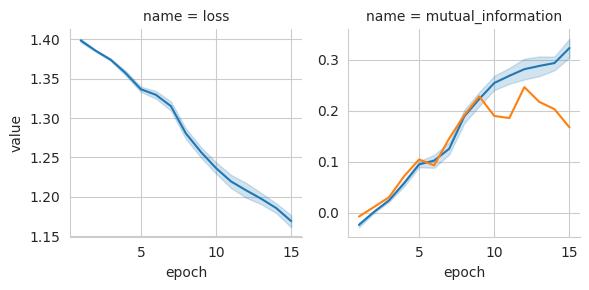

In [19]:
import seaborn as sns
grid = sns.FacetGrid(log, col='name', hue='split', sharey=False)
grid.map(sns.lineplot, 'epoch', 'value')

In [10]:
from rdkit.Chem.rdMolDescriptors import CalcNumRings, CalcNumAtoms, CalcNumAromaticRings, CalcNumHeavyAtoms
from rdkit.Chem.rdmolops import GetDistanceMatrix
from rdkit.Chem.Descriptors import MolWt


properties = {
    "NumAtoms": CalcNumAtoms,
    "NumHeavyAtoms": CalcNumHeavyAtoms,
    "NumRings": CalcNumRings,
    "NumAromaticRings": CalcNumAromaticRings,
    "MolWt": MolWt,
    "MolecularFormula": vector_molecular_formula
}




In [11]:
for name, property in properties.items():
    print(
        f"{name}: {property(dataset.smiles[0])}"
    )

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcNumAtoms(str)
did not match C++ signature:
    CalcNumAtoms(RDKit::ROMol mol)

In [60]:
import numpy as np



<BarContainer object of 119 artists>

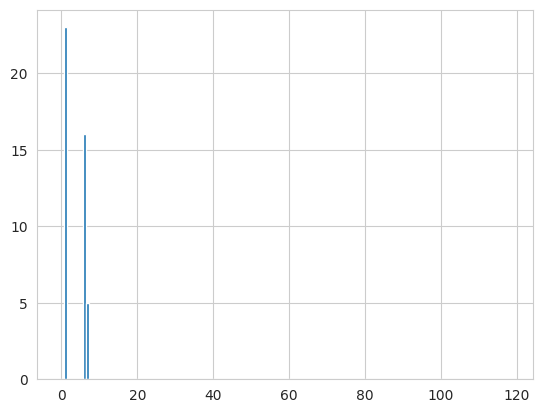

In [61]:
import matplotlib.pyplot as plt

plt.bar(np.arange(num_atoms), chem_formula)

In [54]:
chem_formula

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])